<a href="https://colab.research.google.com/github/TalluriMahesh54/Iris_flower_classicifaction/blob/main/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn


In [2]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["target"] = iris["target"]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
print(df.shape)
print(df.info())
print(df.describe())
print(df['target'].value_counts())

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
       sepal length (cm)  sepal width (cm)  ...  petal width (cm)      target
count         150.000000        150.000000  ...        150.000000  150.000000
mean            5.843333          3.057333  ...          1.199333    1.000000
std             0.828066          0.435866  ...          0.762238    0.819232
min             4.300000          2.000000  ...          0.100000    0.000000
25%             5.100000          2.800000  ...          0.300000    0.000000
50%             5.800000    

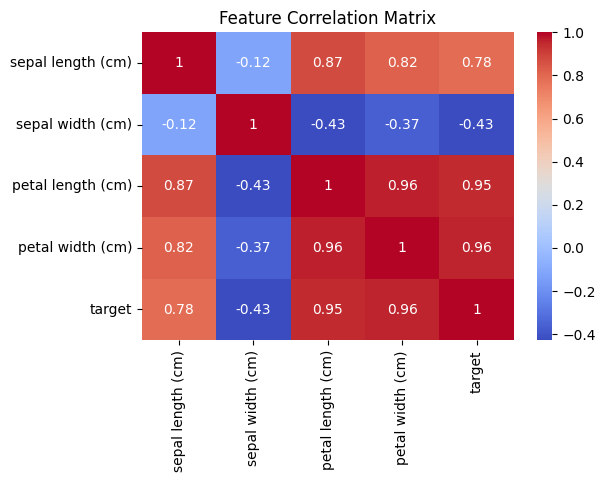

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


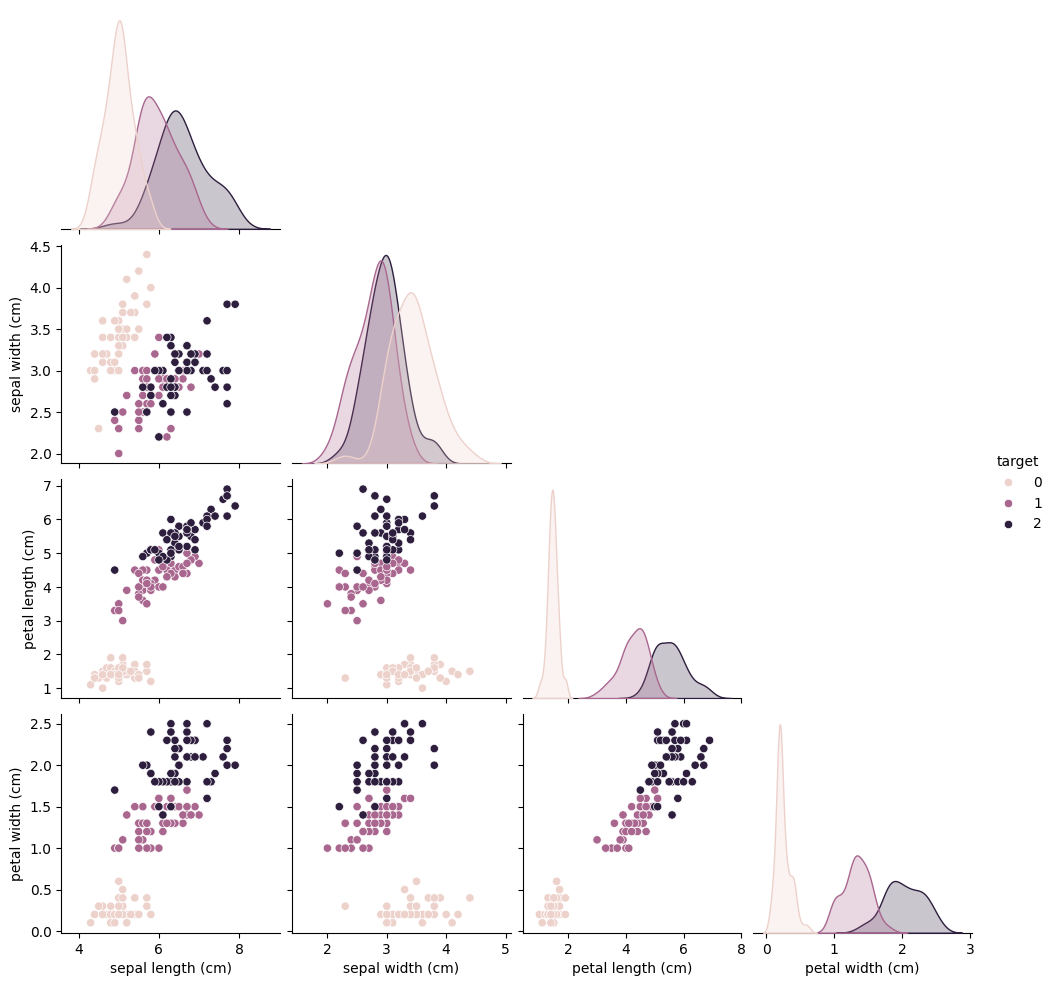

In [7]:
sns.pairplot(df, hue="target", diag_kind="kde", corner=True)
plt.show()

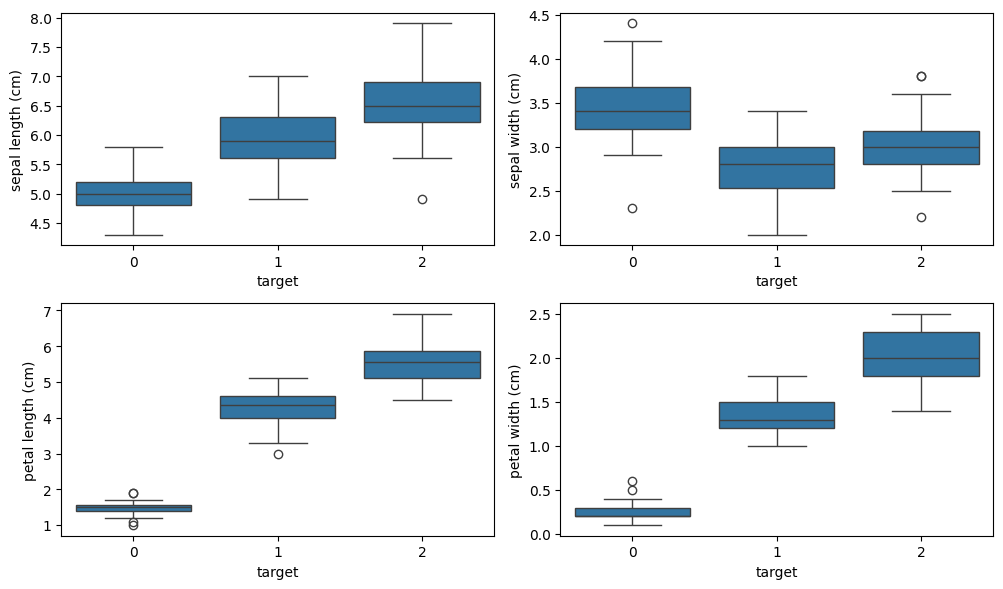

In [9]:
plt.figure(figsize=(10,6))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2,2,i+1)
    sns.boxplot(x="target", y=col, data=df)
plt.tight_layout()
plt.show()

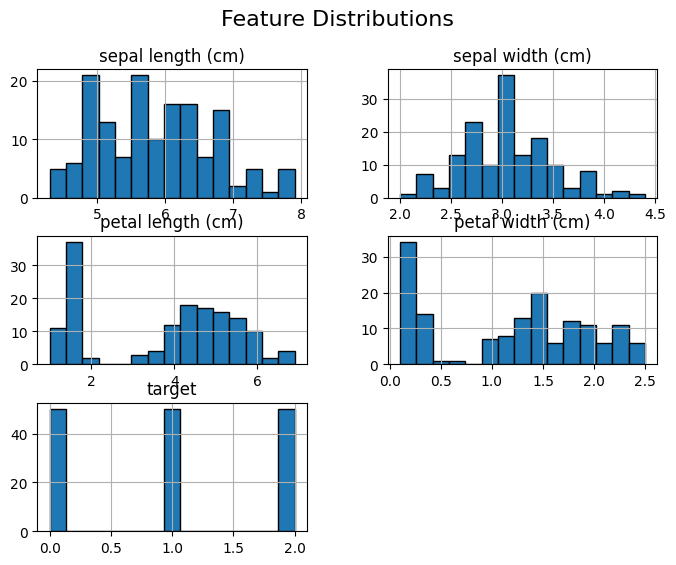

In [10]:
df.hist(figsize=(8,6), bins=15, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

models = {
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name}: {acc:.2f}")


Random Forest: 1.00


In [18]:
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

new_data = [[5.1, 3.5, 1.4, 0.2]]  # Example input
new_data_df = pd.DataFrame(new_data, columns=X_train.columns) # Convert to DataFrame with feature names
prediction = best_model.predict(new_data_df) # Predict using the DataFrame
print("Predicted Species:", iris.target_names[prediction][0])

Predicted Species: setosa


In [19]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 115.1 MB/s eta 0:00:00


In [21]:
%%writefile app.py
import streamlit as st
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
X, y = iris.data, iris.target
model = RandomForestClassifier().fit(X, y)

st.title("🌸 Iris Flower Classifier")
sepal_length = st.slider("Sepal Length", 4.0, 8.0, 5.1)
sepal_width = st.slider("Sepal Width", 2.0, 4.5, 3.5)
petal_length = st.slider("Petal Length", 1.0, 7.0, 1.4)
petal_width = st.slider("Petal Width", 0.1, 2.5, 0.2)

pred = model.predict([[sepal_length, sepal_width, petal_length, petal_width]])
st.write("Predicted Species:", iris.target_names[pred][0])

Writing app.py


In [24]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.16.253.236:8501

  Stopping...
  Stopping...
